https://aclanthology.org/C10-3004.pdf

https://www.ltp-cloud.com

@article{che2020n,
  title={N-LTP: A Open-source Neural Chinese Language Technology Platform with Pretrained Models},
  author={Che, Wanxiang and Feng, Yunlong and Qin, Libo and Liu, Ting},
  journal={arXiv preprint arXiv:2009.11616},
  year={2020}
}



# Introduction

In [42]:
!pip install ltp

In [43]:
from ltp import LTP

ltp = LTP()

### 문장 나누기 ltp.sent_split

In [44]:
sents = ltp.sent_split("他叫汤姆去拿外衣。", "汤姆生病了。他去了医院。")
sents

# result ['他', '叫', '汤', '姆', '去', '拿', '外', '衣', '。']

['他', '叫', '汤', '姆', '去', '拿', '外', '衣', '。']

### 단어 나누기 ltp.seg

In [45]:
segment, _ = ltp.seg(["现在我去教室上课。"])
segment

# result [['现在', '我', '去', '教室', '上课', '。']]

[['现在', '我', '去', '教室', '上课', '。']]

### POS 품사 분석 ltp.pos

In [46]:
seg, hidden = ltp.seg(["现在我去教室上课。"])
pos = ltp.pos(hidden)
print(seg)
print(pos)

# result [['现在', '我', '去', '教室', '上课', '。']]
#         [['nt', 'r', 'v', 'n', 'v', 'wp']]    

[['现在', '我', '去', '教室', '上课', '。']]
[['nt', 'r', 'v', 'n', 'v', 'wp']]


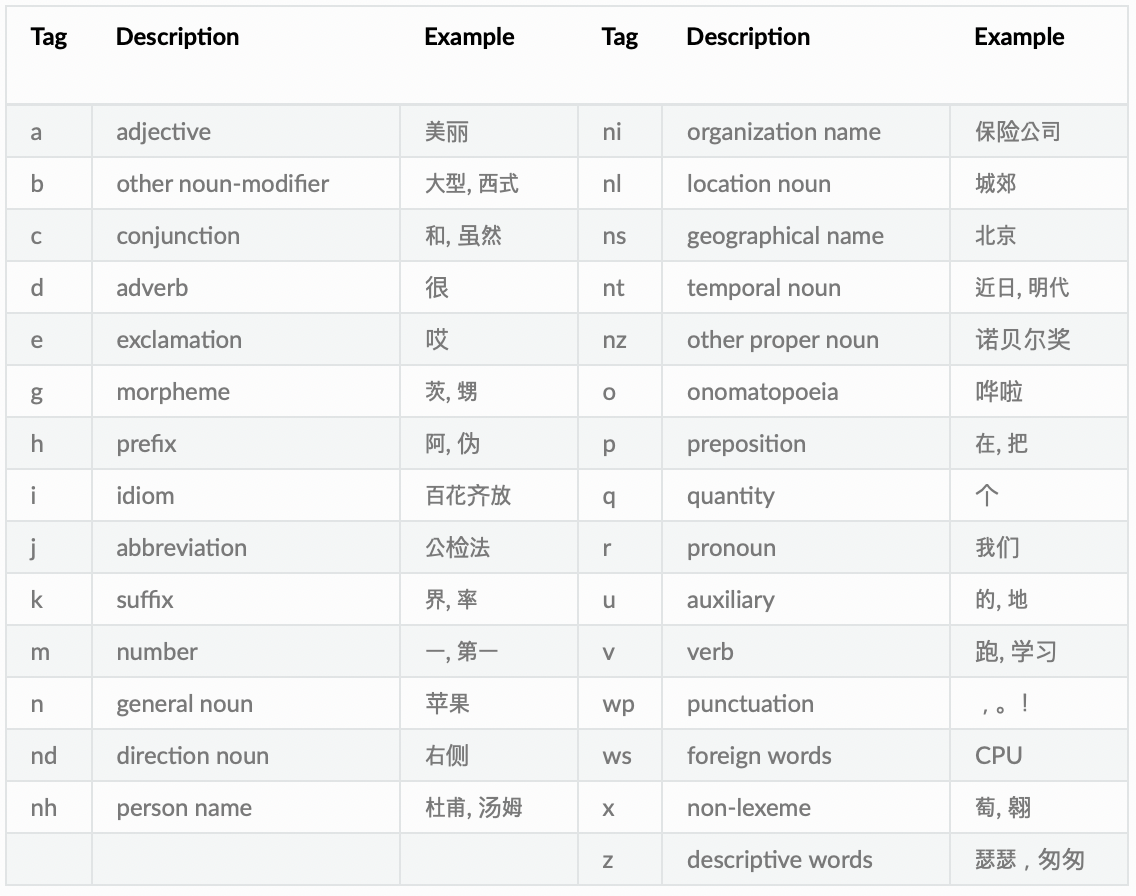

In [47]:
seg, hidden = ltp.seg(["现在我去教室上课。"])
dep = ltp.dep(hidden)
print(seg)
print(dep)

# result [['现在', '我', '去', '教室', '上课', '。']]
#        [[(1, 3, 'ADV'), (2, 3, 'SBV'), (3, 0, 'HED'), (4, 3, 'VOB'), (5, 3, 'COO'), (6, 3, 'WP')]]

[['现在', '我', '去', '教室', '上课', '。']]
[[(1, 3, 'ADV'), (2, 3, 'SBV'), (3, 0, 'HED'), (4, 3, 'VOB'), (5, 3, 'COO'), (6, 3, 'WP')]]


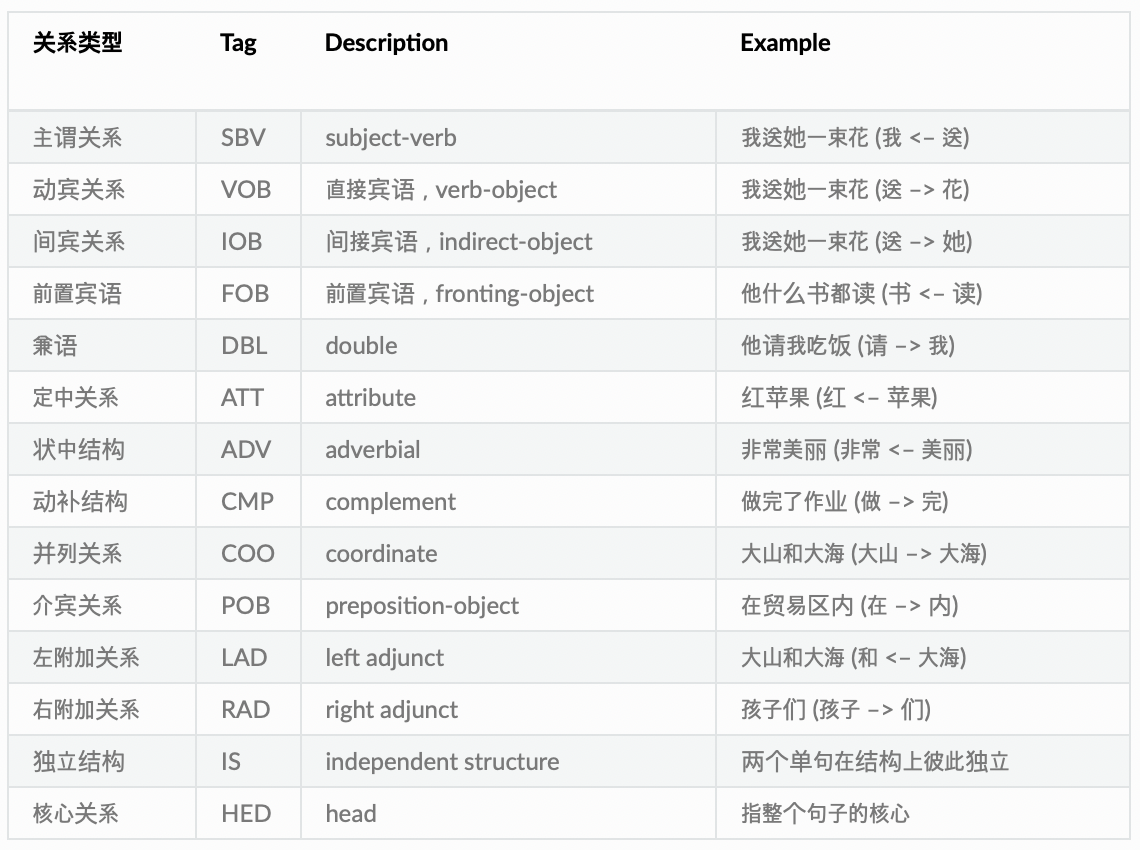

## SDP 의미의존 ltp.sdp

In [48]:
seg, hidden = ltp.seg(["现在我去教室上课。"])
sdp = ltp.sdp(hidden, mode='tree')
print(seg)
print(sdp)

# result [['现在', '我', '去', '教室', '上课', '。']]
#        [[(1, 3, 'TIME'), (2, 3, 'AGT'), (3, 0, 'Root'), (4, 3, 'LOC'), (5, 3, 'eSUCC'), (6, 5, 'mPUNC')]]

[['现在', '我', '去', '教室', '上课', '。']]
[[(1, 3, 'TIME'), (2, 3, 'AGT'), (3, 0, 'Root'), (4, 3, 'LOC'), (5, 3, 'eSUCC'), (6, 5, 'mPUNC')]]


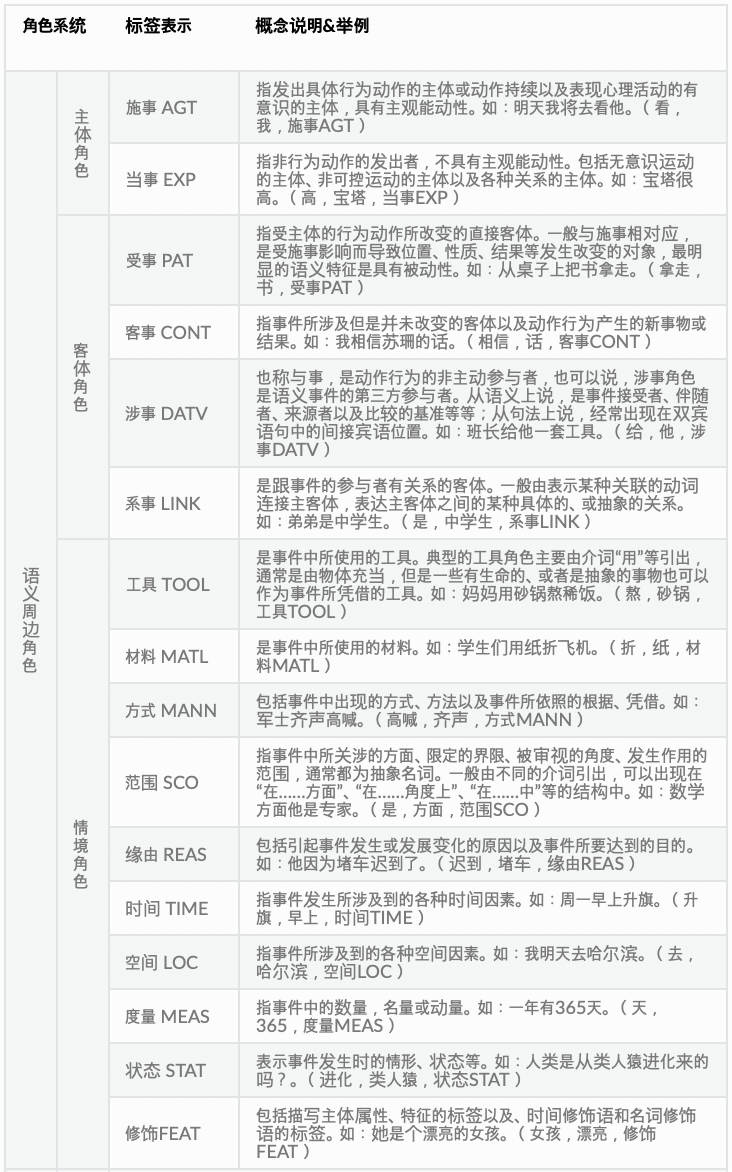

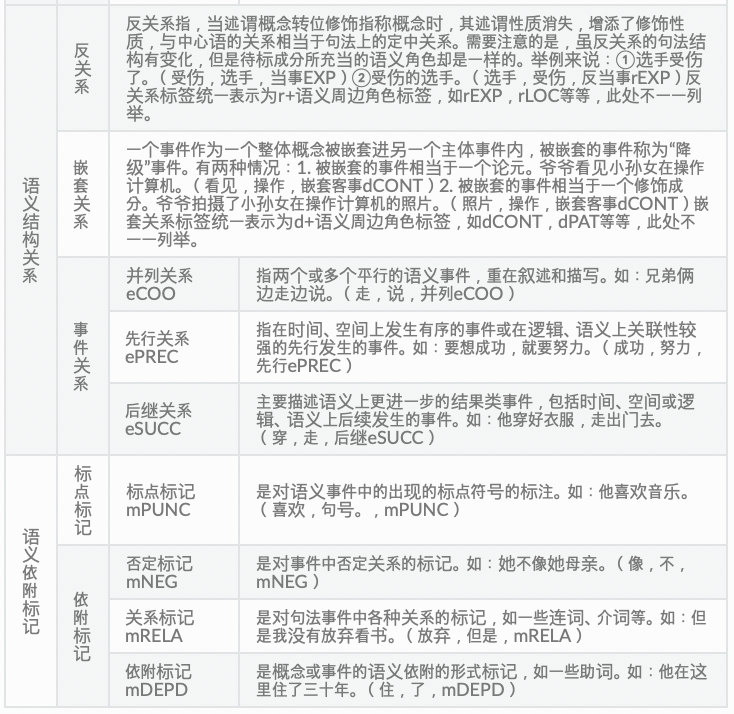

### 중국어 문장 전처리

In [49]:
import os
import re
import time
import glob
import zipfile
import pandas as pd
from ltp import LTP
from pprint import pprint

In [50]:
path_o = input("Type the absolute path name of the folder where the text files are.")
path_p = input("Type the absolute path name of the folder where the preprocessed text file would be saved.")

r_f = re.compile(r"^/")
r_b = re.compile(r"/$")

def path_correction(path):

    if bool(r_b.search(path)) is not True:   # 마지막에 /가 없으면
        path = path + "/"

    return path

path_o = path_correction(path_o)
path_p = path_correction(path_p)

print(path_o)
print(path_p)

text_file_list = []
text_file_list.extend(glob.glob(path_o + "*.txt"))
text_file_list.extend(glob.glob(path_o + "*.csv"))
text_file_list.extend(glob.glob(path_o + "*.xls"))
text_file_list.extend(glob.glob(path_o + "*.xlsx"))

pprint(text_file_list)

Type the absolute path name of the folder where the text files are./content
Type the absolute path name of the folder where the preprocessed text file would be saved./content/sample_data
/content/
/content/sample_data/
['/content/test.txt']


In [51]:
no_colon = [] 
no_qm = []
no_src = []
no_es = []

def preprocess_colon(data):
    
    """
    문장 단위로 데이터를 구분하는 부분입니다.
    """

    for line in data:   
        sents = re.split("[。.,,，:：;；]", line)
        for sent in sents:
            if sent in ["…", "…”", "“…", " ", "\n", "\s"]:
                continue
            
            no_colon.append(sent)

def preprocess_qm(no_colon):
    
    """
    문장부호 및 기타 특수부호를 지우는 부분입니다.
    """
    
    for line in no_colon:
        line = re.sub("\s+","",line)
        line = re.sub("[““””‘‘’’?？!！\-#\《》＠@〖〗\'\"★]", "", line)
        no_qm.append(line)
                  
def preprocess_src(no_qm):
    
    """
    간혹 텍스트 파일에 표기되어 있는 출처를 제거하는 부분입니다.
    """
    
    for line in no_qm:
        line = re.sub(r'\（[^）]*\）|\([^)]*\)', "", line) #()형식의 출처 《》 형식의 출처
        no_src.append(line)


def preprocess_es(no_src):
    
    """
    말줄임표 등을 콤마(,)로 대체하는 부분입니다.
    """

    for line in no_src:
        sent = re.sub('\……|\——', ',', line)
        no_es.append(sent)

In [52]:
ts = time.time()

for file in text_file_list:
    print("File name: {0}".format(file))
    
    fr = open(file, "r")
    
    lines = fr.readlines()

    preprocess_colon(lines)
    preprocess_qm(no_colon)
    preprocess_src(no_qm)
    preprocess_es(no_src)
    
te = time.time()

print("Time spent: {0:.4f} second(s)".format(te - ts))

File name: /content/test.txt
Time spent: 0.0030 second(s)


In [53]:
DATA_OUT = os.path.join(path_p, "preprocessed.txt")   

def dump_txt(out_path):
    
    if "preprocessed.txt" in os.listdir(path_p):

        warning = input("The preprocessed.txt file already exists. Continue? (Y / N) ")
        print(warning)

        if warning not in ["Y", "y", "Yes", "YES"]:
            raise InterruptedError("The user wanted to stop working.")
    
    with open(out_path, 'w') as f:
        for line in no_es:
            f.write(line+'\n')

dump_txt(DATA_OUT)

### seg, pos, dep, sdp 실행

In [54]:
seg, hidden = ltp.seg(no_es)
pos = ltp.pos(hidden)
dep = ltp.dep(hidden)
sdp = ltp.sdp(hidden)

### csv 파일에 결과 저장

In [55]:
import pandas as pd

dict = {'문장': no_es, '단어 분리': seg, '품사 정보': pos, '문장성분 의존관계': dep, '의미역 의존관계': sdp} 
df = pd.DataFrame(dict) 

df.to_csv('test.csv', encoding='utf-8-sig')